In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
list_D=np.round(np.arange(0.4, 2.6, 0.1), decimals=1)

In [54]:
data={}
mag={}
for D in list(list_D):
    #tmp=pd.read_csv('avg_prof_D/D%s/f_bands.dat'%D, sep=' ')
    
    #s=tmp.shape[0]
    try:
        data[D]=pd.read_csv('avg_prof_D/D%s/f_bands.dat'%D, sep=' ', index_col=False, names=[str(a) for a in np.arange(400)]).values
        data[D].dropna(axis='rows', inplace=True)
        print(D, data[D].shape[0])
    #mag[D]=np.sum(np.reshape(tmp.m.values[:400*(s//400)], (-1, 400)), axis=1)
    except:
        pass
    

In [34]:
data[D][-1,:]

array([4.8 , 4.69, 4.94, 5.05, 4.97, 4.53, 4.87, 4.85, 4.52, 4.91, 4.85,
       4.57, 4.94, 4.6 , 4.64, 5.27, 4.96, 4.85, 4.68, 5.33, 5.03, 4.32,
       4.54, 4.52, 4.69, 4.58, 4.98, 4.79, 4.81, 5.27, 5.46, 5.01, 4.61,
       4.93, 5.06, 4.89, 4.77, 4.73, 5.  , 5.14, 5.03, 4.96, 4.71, 4.72,
       4.85, 5.02, 4.85, 4.82, 5.08, 5.38, 4.76, 4.92, 4.94, 5.21, 4.73,
       4.86, 4.89, 4.99, 4.91, 4.71, 4.94, 4.86, 5.05, 4.68, 4.8 , 4.77,
       4.86, 5.02, 4.72, 5.16, 4.93, 4.34, 4.76, 5.12, 4.71, 4.93, 4.63,
       4.37, 4.61, 4.51, 4.5 , 4.33, 4.76, 4.91, 5.25, 4.46, 4.94, 5.08,
       4.66, 4.66, 5.33, 5.07, 4.97, 4.7 , 4.9 , 5.04, 4.92, 4.51, 4.37,
       5.43, 4.74, 4.66, 4.67, 4.74, 4.93, 4.69, 4.78, 4.69, 4.43, 4.72,
       4.69, 4.49, 4.73, 4.16, 4.65, 4.4 , 4.89, 4.64, 4.69, 5.03, 4.62,
       4.85, 4.7 , 4.51, 4.47, 4.73, 4.44, 4.27, 4.71, 4.99, 4.61, 4.92,
       5.16, 4.92, 5.26, 5.04, 5.04, 5.4 , 4.94, 4.94, 4.8 , 4.92, 5.4 ,
       5.11, 4.53, 4.85, 4.49, 4.36, 4.61, 3.92, 3.

In [55]:
x1={}
x2={}
dx={}

for D in list_D:
    th=np.max(data[D][-1,:])/2
    print(D, th)
    
    t0, x0 = np.where((data[D]<=th)&(np.roll(data[D],-5, axis=1)>=th))
    x1[D]=x0[np.unique(t0, return_index=True)[1]]

    t0, x0 = np.where((data[D]>=th)&(np.roll(data[D],-5, axis=1)<th))
    x2[D]=x0[np.unique(t0, return_index=True)[1]]

    dx[D]=[]
    for t in range(data[D].shape[0]):
        if x2[D][t]>x1[D][t]:
            dx[D].append(np.int64(0.5*(x2[D][t]+x1[D][t]-400)))
        else:
            dx[D].append(np.int64(0.5*(x2[D][t]+x1[D][t])))

    dx[D]=np.array(dx[D])
    


0.4 3.805
0.5 3.665
0.6 3.41
0.7 3.29
0.8 3.215
0.9 3.225
1.0 3.17
1.1 3.29
1.2 3.075
1.3 3.05
1.4 3.06
1.5 2.93
1.6 2.87
1.7 2.925
1.8 2.865
1.9 2.84
2.0 2.745
2.1 2.835
2.2 2.8
2.3 2.74
2.4 2.695
2.5 2.73


(400, 500)

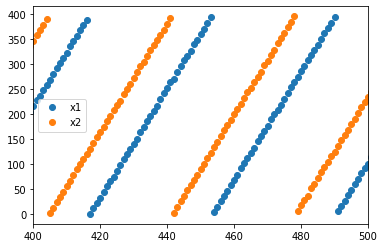

In [21]:
D=0.4
#plt.plot(0.5*(x1[D]+x2[D]-2*dx[D]))
plt.plot(x1[D], 'o', label='x1')
plt.plot(x2[D], 'o', label='x2')
#plt.plot(dx[D])

plt.legend()

plt.xlim(400,500)

In [68]:
avg_prof={}
for D in list_D:
    print(D)
    avg_prof[D]=np.mean([np.roll(data[D][t, :], 
                             -dx[D][t]) 
                     for t in range(0, 9000) 
                     if x2[D][t]>x1[D][t]+50]
        , axis=0)

0.4
0.5
0.6
0.7
0.8
0.9
1.0
1.1
1.2
1.3
1.4
1.5
1.6
1.7
1.8
1.9
2.0
2.1
2.2
2.3
2.4
2.5


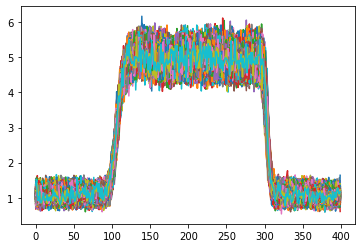

In [77]:
D=2.0
for t in range(0, 10000, 10):
    #if x2[D][t]>x1[D][t]+50:
    plt.plot(np.roll(data[D][t, :], -dx[D][t]) )

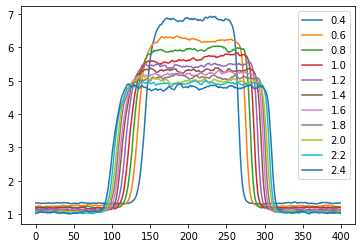

In [74]:
for D in list_D[::2]:
    try :
        plt.plot(avg_prof[D], label=D)
    except:
        pass
    
    plt.legend()

In [70]:
rhol0={}
rhog0={}

for D in list_D:
    rhol0[D]=np.mean(avg_prof[D][170:230])
    rhog0[D]=np.mean(np.roll(avg_prof[D], 200)[180:220])
    

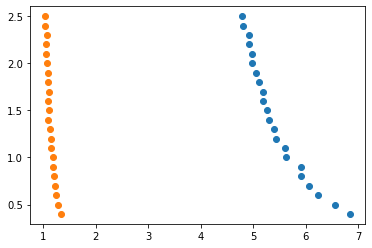

In [71]:
u=list(rhol0)
plt.plot([rhol0[D] for D in u], u, 'o')
plt.plot([rhog0[D] for D in u], u, 'o')

In [72]:
phi={D:np.mean(avg_prof[D]>3) for D in list_D}

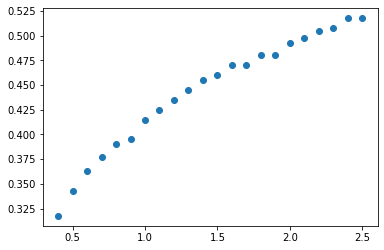

In [73]:
plt.plot(list_D, [phi[D] for D in list_D], 'o')